In [267]:
import numpy as np

In [268]:
alpha_angle=np.array([20, 25, 30, 35])
beta_dict = {20 : np.array([17, 17, 16, 17, 17]), 25 : np.array([22, 23, 22, 22, 23]), 30:np.array([26, 27, 26, 27, 27]), 35:np.array([32, 32, 32, 32, 32])}
U_dict = {20 : np.array([5.4, 5.7, 5.6, 5.8, 5.8]), 25 : np.array([5.8, 6, 6, 6, 5.8]), 30:np.array([5.8, 5.8, 6, 5.8, 5.8]), 35:np.array([6.2, 5.4, 5.6, 5.6, 5.8])}
time_dict = {20 : np.array([136, 130, 123, 126, 131]) * 1e-6, 25 : np.array([128, 113, 121, 124, 128]) * 1e-6, 30:np.array([121, 111, 121, 110, 118]) * 1e-6, 35:np.array([116, 111, 113, 116, 113]) * 1e-6}

l  = 42e-2
d  = 3.8e-2
ro = 7.8e3
g  = 9.8
R = 15e6*90/(90 + 15e6)
C = 10 * 1e-6
m = ro * (4/3) * np.pi * (d/2)**3
U0 = 6.6
Beta = np.sqrt(d) * 2.1e11/(3 * (1 - 0.3**2))

In [269]:
get_h      = lambda alpha : l * (1 - np.cos(np.radians(alpha)))
get_v      = lambda alpha : np.sqrt(2 * g * get_h(alpha))
get_k      = lambda u1, u2, v1, v2 : (u2 - u1) / (v1 - v2)
get_tau2   = lambda U0, U : R * C * np.log(U0/U)
get_tau1   = lambda v0 : 2.943*(5 * m/ (4* Beta))**(2/5) * v0**(-1/5)
get_S      = lambda K , v: (1 + K) * (m/2) * v
get_P      = lambda x : Beta * x**(3/2)
get_T_lost = lambda u1, v1, u2, v2 : .5 * m * (u1 - v1)**2 + .5 * m(u2 - v2)**2

1.

In [270]:
v1 = get_v(alpha_angle)
v2 = 0
u1 = 0
u2 = get_v([ np.mean(val)  for val in beta_dict.values() ])

print(get_k(u1, u2, v1, v2))


[0.84125863 0.89740666 0.88884393 0.91663465]


3.

In [271]:
v1 = get_v(alpha_angle)
v2 = np.zeros(len(v1))
u1 = np.zeros(len(v1))
u2 = [get_v(np.mean(angle)) for key, angle in beta_dict.items()]

k = get_k(u1, u2, v1, v2)


S_list = get_S(k, u2)
print(S_list)

[0.1222915  0.16755915 0.19756023 0.24019232]


5.

In [272]:

print(get_tau2( np.full( (len(alpha_angle)), U0), [np.mean(u) for key, u in U_dict.items()]))

[1.38280351e-04 9.78592930e-05 1.10104306e-04 1.28789987e-04]


6.

In [273]:
print( get_tau1(get_v(alpha_angle)))

[0.00016135 0.00015439 0.00014897 0.00014457]


7.

In [274]:
get_xmax1 = lambda v : ( (5 * m * v**2) / (4 * Beta) )**(2/5)
get_Pmax1 = lambda v : Beta**(2/5)*(5*m*v**2/4)**(3/5) 

get_xmax2 = lambda v,tau : 0.34 * v * tau
get_Pmax2 = lambda v,tau : 3.68 * m * v / tau

speed_list = get_v(alpha_angle)
tau_list   = get_tau1(speed_list)


print("First", get_xmax1(speed_list), get_Pmax1(speed_list))
print("Second", get_xmax2(speed_list, tau_list), get_Pmax2(speed_list, tau_list))



First [3.86289194e-05 4.60729241e-05 5.31585786e-05 5.99362848e-05] [3600.12255794 4689.39817738 5811.77090234 6957.97997485]
Second [3.86528694e-05 4.61014893e-05 5.31915370e-05 5.99734452e-05] [3601.34584117 4690.99158485 5813.74568009 6960.34422221]


8.

In [275]:
Pmean = S_list / tau_list
print(Pmean)

[ 757.93392226 1085.26687894 1326.17183801 1661.45472215]


9.

In [276]:
from scipy.integrate import quad


P_intg = lambda x : quad(get_P, 0, x)[0]

def get_nested(v):
    return lambda x : 2 / np.sqrt( v**2 - 2/m*P_intg(x) )

intg_list = [ quad(get_nested(sp), 0, get_xmax1(sp))[0] for sp in speed_list ]
print(intg_list)

[0.0001613635740733724, 0.00015440885870631095, 0.00014898423558431197, 0.0001445809926943988]


10.

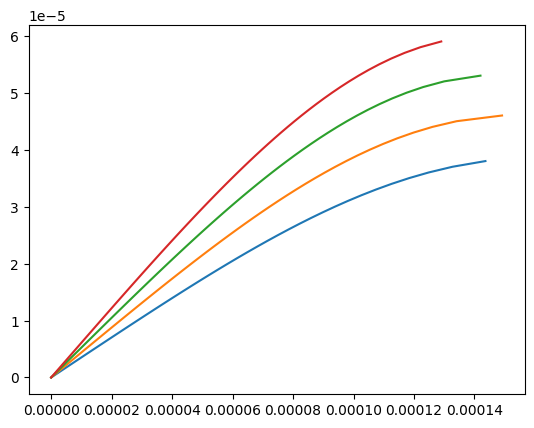

In [277]:
import matplotlib.pyplot as plt


step = 1e-6

for speed in speed_list:
    max_x = get_xmax1(speed)
    rang = np.arange(0, max_x, step)
    plt.plot([ quad(get_nested(speed), 0, x )[0] for x in rang ], rang)

